In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree, preprocessing, datasets

In [2]:
dataset = "dataset.csv"
data = pd.read_csv(dataset)

In [3]:
data

,License,Drunk,Glasses,Clothes Color,Weight,Eat Beef,Vegetarianism,Gender,Unemployed,Hair,...,Hat,Member of Costco,Member of Ikea,Member of Carrefour,Use Gmail,Foreigner,Use Apple,Tired,Health,Predict Class
0,True,True,True,Yellow,Thin,True,False,Others,False,Long,...,False,True,True,True,False,False,False,False,True,False
1,True,False,False,Green,Thin,False,True,Male,False,Short,...,True,True,True,False,False,False,False,False,False,False
2,True,False,False,Yellow,Thin,False,False,Male,False,Long,...,False,True,True,True,False,True,True,False,True,True
3,True,False,True,Black,Fat,True,False,Others,True,Short,...,False,False,False,True,True,True,False,False,False,False
4,True,False,False,White,Fat,True,False,Female,True,Short,...,True,True,True,False,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,True,True,False,Yellow,Normal,True,False,Others,True,Short,...,False,True,True,True,False,False,False,False,True,False
496,True,False,True,White,Normal,False,False,Others,False,Long,...,True,True,True,False,True,False,False,False,False,False
497,True,False,True,White,Normal,True,True,Others,True,Long,...,True,False,True,True,True,True,True,False,False,False
498,True,False,False,White,Normal,True,True,Others,True,Long,...,False,False,True,False,False,True,False,False,True,True


In [4]:
columns = list(data.columns)

In [5]:
labelencoder = preprocessing.LabelEncoder()
for col in columns:
    data[col] = labelencoder.fit_transform(data[col])

In [6]:
data

,License,Drunk,Glasses,Clothes Color,Weight,Eat Beef,Vegetarianism,Gender,Unemployed,Hair,...,Hat,Member of Costco,Member of Ikea,Member of Carrefour,Use Gmail,Foreigner,Use Apple,Tired,Health,Predict Class
0,1,1,1,6,2,1,0,2,0,0,...,0,1,1,1,0,0,0,0,1,0
1,1,0,0,2,2,0,1,1,0,2,...,1,1,1,0,0,0,0,0,0,0
2,1,0,0,6,2,0,0,1,0,0,...,0,1,1,1,0,1,1,0,1,1
3,1,0,1,0,0,1,0,2,1,2,...,0,0,0,1,1,1,0,0,0,0
4,1,0,0,5,0,1,0,0,1,2,...,1,1,1,0,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,0,6,1,1,0,2,1,2,...,0,1,1,1,0,0,0,0,1,0
496,1,0,1,5,1,0,0,2,0,0,...,1,1,1,0,1,0,0,0,0,0
497,1,0,1,5,1,1,1,2,1,0,...,1,0,1,1,1,1,1,0,0,0
498,1,0,0,5,1,1,1,2,1,0,...,0,0,1,0,0,1,0,0,1,1


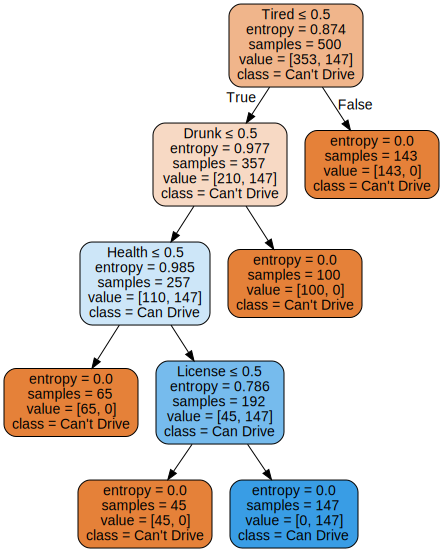

In [14]:
clf = tree.DecisionTreeClassifier(criterion="entropy").fit(data[columns[:-1]], data[columns[-1]])
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=columns[:-1], class_names=["Can't Drive", "Can Drive"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

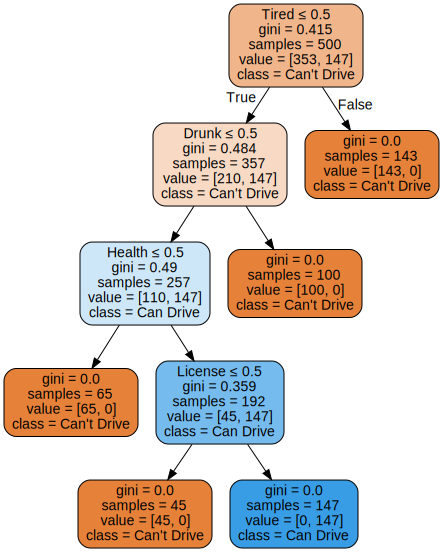

In [15]:
clf = tree.DecisionTreeClassifier(criterion="gini").fit(data[columns[:-1]], data[columns[-1]])
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=columns[:-1], class_names=["Can't Drive", "Can Drive"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph